In [1]:
import numpy as np
import pandas as pd
import os 
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout


In [2]:
dir=os.getcwd()
print(os.getcwd())

X_train = pd.read_csv(os.path.join(dir, "data/train.csv")) 
X_test_file = pd.read_csv(os.path.join(dir, "data/test.csv"))



C:\Users\Vincent\PycharmProjects\Kaggle\DigitRecognizer


In [20]:
print(X_train.shape)

(42000, 785)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

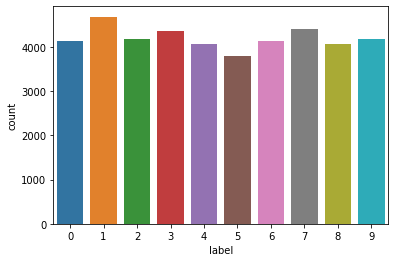

In [3]:
Y_train = X_train["label"]
g = sns.countplot(Y_train)

Y_train.value_counts()

In [4]:
X_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [5]:
X_test_file.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
img_rows,img_cols= 28,28
nb_classes=10

def data_prep(raw):
    out_y=tf.keras.utils.to_categorical(raw.label, nb_classes)
    nb_images=raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(nb_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y


X,y = data_prep(X_train)




In [21]:
model=Sequential()


model.add(Conv2D(32, kernel_size=(5, 5), strides=2, activation='relu',input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.fit(X, y,batch_size=100,epochs=10,validation_split = 0.2)


Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 9s 262us/sample - loss: 0.4220 - accuracy: 0.8640 - val_loss: 0.1057 - val_accuracy: 0.9670
Epoch 2/10
33600/33600 [==============================] - 9s 254us/sample - loss: 0.1188 - accuracy: 0.9635 - val_loss: 0.0644 - val_accuracy: 0.9799
Epoch 3/10
33600/33600 [==============================] - 8s 253us/sample - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0519 - val_accuracy: 0.9842
Epoch 4/10
33600/33600 [==============================] - 8s 248us/sample - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 5/10
33600/33600 [==============================] - 8s 251us/sample - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0382 - val_accuracy: 0.9879
Epoch 6/10
33600/33600 [==============================] - 8s 252us/sample - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 7/10
33600/33600 [===========================

In [36]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X)

In [ ]:
#history = model.fit_generator(datagen.flow(X,y, batch_size=100),
#                              epochs = 100, validation_data = (X_val,Y_val),
#                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                              , callbacks=[learning_rate_reduction])

In [28]:
nb_images=X_test_file.shape[0]
X_as_array = X_test_file.values[:,:]
X_test = X_as_array.reshape(nb_images, img_rows, img_cols, 1) / 255


results = model.predict(X_test)

In [29]:
print(results[0])
print(nb_images)


[9.3396096e-11 8.1299741e-12 1.0000000e+00 3.2349573e-10 2.2119950e-13
 2.6126420e-14 2.3525016e-13 2.4510418e-11 2.1891518e-11 2.3258858e-15]
28000


In [30]:
# select the indix with the maximum probability
results_modified = np.argmax(results,axis = 1)

results_series = pd.Series(results_modified,name="Label")


In [31]:
print(results_series)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results_series],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)